# lecture

## 7.1 rate
- large learning rate : 굉장히 띄엄띄엄 러닝하기 때문에 밖으로 팅겨 나가게 되는 현상이 발생 할 수 있다.
- short learning rate : 굉장히 촘촘하게 러닝하여 오래 걸리고 다 러닝할 수 없게 되는 현상이 발생 한다.

=> learning rate는 잘 조절해야함

- standardization(normalization data) = (값 - 평균) / 분산
      = x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
- overfitting : 데이터에 너무 치중하여 오버된 값까지 모두 생각해서 계산하는 것 따라서  정확도가 떨어지게 되는 현상이 발생한다. 이를 해결하기 위해 학습 데이터를 늘리고 중복되는 것은 줄이고 일반화시키는 방법이 있다.
- regularization(일반화) :구불구불한 그래프의 경우에 이것을 펴주는 것
      = cost식에서 term을 추가시키면 된다. 각 요소의 제곱의 합과 regularization strength라는 상수를 곱해준 값이 term이다.
          ex) l2reg = 0.001 * tf.reduce_sum(tf.square(w)
          (0.001 : regularization strength)

## 7.2 training/testing 데이터 셋

:만약 여러개의 데이터가 있을 때 모든 데이터가 트레이닝에 사용되면 답은 입력된 대로 나오기 때문에 답은 고정되어있다.

=> 이를 해결하려면 70퍼정도를 training 30퍼를 testing으로 두고 데이터를 이용해야한다.

- training set : training set에는 앞에서 배웠던 알파나 람다 값도 다루게 되는데 이것을 처리하기 위해서 training과 validation이라는 단계를 따로 두어 training에서 학습을 시키고 validation에서 알파나 람다 값을 튜닝을 해준다. 이후에 testing에서 시험해 봄

- Accuracy : testing한 값과 원래의 결과 값을 비교해서 정확도를 확인한다.

# programming

## 7.3 training/test dataset, learning rate, normalization

In [4]:
import tensorflow as tf

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5],[1, 7, 5],[1, 2, 5],[1, 6, 6],[1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],[0, 1, 0],[0, 1, 0],[1, 0, 0],[1, 0, 0]]


# testing set
x_test = [[2, 1, 1], [3, 1, 2],[3, 3, 4]]
y_test = [[0, 0, 1],[0, 0, 1],[0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1).minimize(cost)

# 예측값이 맞는지 확인하기
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    #training
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    #testing
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


0 3.70868 [[-1.60347748  1.05094433 -0.27734786]
 [ 0.41523954  1.25533819 -1.21930194]
 [ 1.07775688 -0.14921755  0.94112849]]
1 3.0253 [[-1.60979068  1.02008939 -0.24017973]
 [ 0.44603747  1.12524164 -1.12000334]
 [ 1.07589436 -0.23332471  1.02709818]]
2 2.69324 [[-1.6355679   1.00908935 -0.20340258]
 [ 0.37021622  1.10262573 -1.02156615]
 [ 0.96847963 -0.2101047   1.11129296]]
3 2.3827 [[-1.64499462  0.98331344 -0.16819987]
 [ 0.37763917  1.0001533  -0.92651665]
 [ 0.94842488 -0.2666555   1.18789852]]
4 2.1123 [[-1.66489995  0.97030455 -0.13528565]
 [ 0.3219716   0.96607947 -0.83677524]
 [ 0.87098598 -0.25511321  1.25379515]]
5 1.89965 [[-1.67262959  0.94948292 -0.10673432]
 [ 0.32230633  0.88684106 -0.75787163]
 [ 0.85763043 -0.28686818  1.29890573]]
6 1.75281 [[-1.68585312  0.9381364  -0.08216425]
 [ 0.28530702  0.85745502 -0.69148624]
 [ 0.81354928 -0.26943713  1.3255558 ]]
7 1.66373 [[-1.69106817  0.92349225 -0.06230504]
 [ 0.28745484  0.80682153 -0.6430006 ]
 [ 0.81203055 -0.27

108 0.683458 [[-2.19661355  0.32965049  1.03708172]
 [ 0.28125578  0.06029026  0.10973018]
 [ 0.95344234  0.72645754  0.18976834]]
109 0.68171 [[-2.20091081  0.32674518  1.04428422]
 [ 0.28119865  0.0603582   0.10971936]
 [ 0.95528144  0.72780174  0.18658504]]
110 0.679988 [[-2.2051971   0.32387683  1.05143893]
 [ 0.28114522  0.06044831  0.10968269]
 [ 0.95711154  0.72910792  0.18344873]]
111 0.678289 [[-2.20947266  0.32104483  1.05854654]
 [ 0.28109571  0.06055924  0.10962124]
 [ 0.95893294  0.73037714  0.1803581 ]]
112 0.676613 [[-2.21373773  0.31824878  1.06560767]
 [ 0.28104985  0.06069031  0.10953606]
 [ 0.96074533  0.73161101  0.17731185]]
113 0.67496 [[-2.21799231  0.31548807  1.0726229 ]
 [ 0.28100803  0.06084006  0.10942812]
 [ 0.96254921  0.73281026  0.17430875]]
114 0.673329 [[-2.22223639  0.31276232  1.07959282]
 [ 0.28096977  0.0610081   0.10929836]
 [ 0.96434414  0.73397654  0.17134753]]
115 0.67172 [[-2.22647023  0.31007096  1.08651805]
 [ 0.28093547  0.06119301  0.10914

- learning rate가 클경우 nan이 나오는 현상이 발생한다.

In [3]:
import tensorflow as tf

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5],[1, 7, 5],[1, 2, 5],[1, 6, 6],[1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],[0, 1, 0],[0, 1, 0],[1, 0, 0],[1, 0, 0]]


# testing set
x_test = [[2, 1, 1], [3, 1, 2],[3, 3, 4]]
y_test = [[0, 0, 1],[0, 0, 1],[0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=1.5).minimize(cost)

# 예측값이 맞는지 확인하기
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    #training
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    #testing
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


0 3.12906 [[-1.01381755  0.13082397  2.15642881]
 [ 2.51936507 -3.3371594   1.06212533]
 [ 3.22010565 -1.92360735  1.13485515]]
1 22.9442 [[-2.1261158   0.69332397  2.7062273 ]
 [-1.57984471 -0.7121594   2.53633571]
 [-0.89178133  0.88889265  2.43424273]]
2 23.6021 [[-1.7511158   1.2558229   1.76872838]
 [ 0.85765529  1.91283846 -2.52616239]
 [ 1.54571867  3.7013917  -2.81575632]]
3 15.4803 [[-1.37647879  0.31868601  2.33122826]
 [ 3.294415   -2.02392101 -1.02616262]
 [ 3.98284054 -0.04823017 -1.50325644]]
4 24.9305 [[-2.50147438  0.88118595  2.89372396]
 [-0.83057642  0.60107899  0.47382903]
 [-0.14215517  2.76426983 -0.19076061]]
5 9.10625 [[-2.12648606  0.09125018  3.30867124]
 [ 1.60689974 -3.02364397  1.66107547]
 [ 2.29533267 -0.82039881  0.95642042]]
6 14.2129 [[-2.30359197  0.65375018  2.92327714]
 [ 0.98853815 -0.39864397 -0.34556305]
 [ 1.54597592  1.99210119 -1.10672283]]
7 2.60826 [[-2.99491024  0.91304708  3.35529852]
 [-2.08851624  1.44763422  0.88521326]
 [-1.20411277  3

- learning rate가 완전히 작을 경우 cost가 거의 같은 값이 나오고 이동이 거의 없는 현상이 발생한다.

In [5]:
import tensorflow as tf

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5],[1, 7, 5],[1, 2, 5],[1, 6, 6],[1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],[0, 1, 0],[0, 1, 0],[1, 0, 0],[1, 0, 0]]


# testing set
x_test = [[2, 1, 1], [3, 1, 2],[3, 3, 4]]
y_test = [[0, 0, 1],[0, 0, 1],[0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=1e-10).minimize(cost)

# 예측값이 맞는지 확인하기
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    #training
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    #testing
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


0 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
1 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
2 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
3 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
4 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
5 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
6 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
7 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0

105 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
106 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
107 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
108 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
109 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
110 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
111 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]
 [-1.0786556   0.43431997 -1.31637883]]
112 4.51399 [[-0.37378627 -0.24196044  0.60383075]
 [ 0.33969271 -0.04373804 -0.58526856]


- Non-normalized된 input값들을 주게 되면 한쪽 방향으로 치우친 그래프가 나오게 되고 예측을 할 시 어느 순간 팅겨나가는 현상이 발생한다.

In [7]:
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  1.87575e+12 
Prediction:
 [[  966736.0625]
 [ 1945891.25  ]
 [ 1530813.75  ]
 [ 1073161.875 ]
 [ 1264739.125 ]
 [ 1275378.125 ]
 [ 1168948.125 ]
 [ 1488227.375 ]]
1 Cost:  2.06085e+27 
Prediction:
 [[ -3.20224142e+13]
 [ -6.44644015e+13]
 [ -5.07118197e+13]
 [ -3.55487187e+13]
 [ -4.18960638e+13]
 [ -4.22486915e+13]
 [ -3.87223891e+13]
 [ -4.93012963e+13]]
2 Cost:  inf 
Prediction:
 [[  1.06142609e+21]
 [  2.13675958e+21]
 [  1.68091156e+21]
 [  1.17831013e+21]
 [  1.38870141e+21]
 [  1.40038980e+21]
 [  1.28350563e+21]
 [  1.63415786e+21]]
3 Cost:  inf 
Prediction:
 [[ -3.51824000e+28]
 [ -7.08257786e+28]
 [ -5.57160854e+28]
 [ -3.90566815e+28]
 [ -4.60303842e+28]
 [ -4.64178119e+28]
 [ -4.25435305e+28]
 [ -5.41663747e+28]]
4 Cost:  inf 
Prediction:
 [[  1.16616812e+36]
 [  2.34761602e+36]
 [  1.84678470e+36]
 [  1.29458635e+36]
 [  1.52573919e+36]
 [  1.53858097e+36]
 [  1.41016273e+36]
 [  1.79541744e+36]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 

- min-max scale함수를 이용하여 normalized된 input값을 이용할 경우 팅겨나가는 현상이 사라진다.

In [9]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

[[ 0.99999999  0.99999999  0.          1.          1.        ]
 [ 0.70548491  0.70439552  1.          0.71881782  0.83755791]
 [ 0.54412549  0.50274824  0.57608696  0.606468    0.6606331 ]
 [ 0.33890353  0.31368023  0.10869565  0.45989134  0.43800918]
 [ 0.51436     0.42582389  0.30434783  0.58504805  0.42624401]
 [ 0.49556179  0.42582389  0.31521739  0.48131134  0.49276137]
 [ 0.11436064  0.          0.20652174  0.22007776  0.18597238]
 [ 0.          0.07747099  0.5326087   0.          0.        ]]
0 Cost:  2.45275 
Prediction:
 [[-1.71137929]
 [-1.53180051]
 [-1.02103424]
 [-0.39743036]
 [-0.83632261]
 [-0.70120412]
 [ 0.07918358]
 [ 0.3155672 ]]
1 Cost:  2.45259 
Prediction:
 [[-1.71130347]
 [-1.53172946]
 [-1.02097547]
 [-0.39738548]
 [-0.83626878]
 [-0.70115232]
 [ 0.07921612]
 [ 0.31559846]]
2 Cost:  2.45244 
Prediction:
 [[-1.71122789]
 [-1.53165841]
 [-1.0209167 ]
 [-0.39734071]
 [-0.83621496]
 [-0.70110053]
 [ 0.07924873]
 [ 0.31562972]]
3 Cost:  2.45228 
Prediction:
 [[-1.711

## 7.4 Meet MNIST Dataset

:이미지(글자) 데이터를 가져와서 이 글자를 예측한다.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.725033509
Epoch: 0002 cost = 1.048802603
Epoch: 0003 cost = 0.837818844
Epoch: 0004 cost = 0.735638520
Epoch: 0005 cost = 0.671945115
Epoch: 0006 cost = 0.626668574
Epoch: 0007 cost = 0.592652842
Epoch: 0008 cost = 0.564918966
Epoch: 0009 cost = 0.542093165
Epoch: 0010 cost = 0.522675276
Epoch: 0011 cost = 0.506118180
Epoch: 0012 cost = 0.491395916
Epoch: 0013 cost = 0.479053673
Epoch: 0014 cost = 0.467385073
Epoch: 0015 cost = 0.456814755
Learning finished
Accuracy:  0.8897
Label:  [6]
Prediction:  [6]


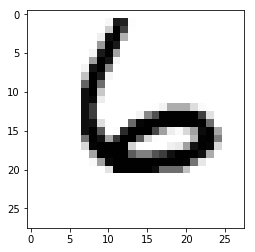

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10
# MNIST data image 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15   #15번 학습시킨다.
batch_size = 100  #한번에 조금씩 잘라서 예측한다.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28),cmap='Greys',interpolation='nearest')
    plt.show()
